Rolex R Calupig Jr

BSCS-2B



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import numpy as np

In [ ]:
# Loading the dataset
df = pd.read_csv("/content/onlinefoods.csv")

# Displaying the first few rows of the dataset
df.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes


In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()

print(f"Missing values count: \n{missing_values}")

Missing values count: 
Age                           0
Gender                        0
Marital Status                0
Occupation                    0
Monthly Income                0
Educational Qualifications    0
Family size                   0
latitude                      0
longitude                     0
Pin code                      0
Output                        0
Feedback                      0
Unnamed: 12                   0
dtype: int64


In [ ]:
df_dummies = df.copy()

# Creating dummy variables for categorical features
df_dummies = pd.get_dummies(df)
df_dummies.head()

,Age,Family size,latitude,longitude,Pin code,Gender_Female,Gender_Male,Marital Status_Married,Marital Status_Prefer not to say,Marital Status_Single,...,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,Output_No,Output_Yes,Feedback_Negative,Feedback_Positive,Unnamed: 12_No,Unnamed: 12_Yes
0,20,4,12.9766,77.5993,560001,1,0,0,0,1,...,0,1,0,0,0,1,0,1,0,1
1,24,3,12.9770,77.5773,560009,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
2,22,3,12.9551,77.6593,560017,0,1,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,22,6,12.9473,77.5616,560019,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,1
4,22,4,12.9850,77.5533,560010,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,1


In [ ]:
# Dropping unnecessary columns and separating predictors (X) and target variable (y)
X = df_dummies.drop(['Pin code', 'Output_No', 'Output_Yes', 'Unnamed: 12_No', 'Unnamed: 12_Yes', 'Monthly Income_No Income', 'Feedback_Positive', 'Feedback_Negative '], axis=1)
y = df_dummies['Feedback_Negative ']


In [ ]:
df.describe()

,Age,Family size,latitude,longitude,Pin code
count,388.000000,388.000000,388.000000,388.000000,388.000000
mean,24.628866,3.280928,12.972058,77.600160,560040.113402
std,2.975593,1.351025,0.044489,0.051354,31.399609
min,18.000000,1.000000,12.865200,77.484200,560001.000000
25%,23.000000,2.000000,12.936900,77.565275,560010.750000
50%,24.000000,3.000000,12.977000,77.592100,560033.500000
75%,26.000000,4.000000,12.997025,77.630900,560068.000000
max,33.000000,6.000000,13.102000,77.758200,560109.000000


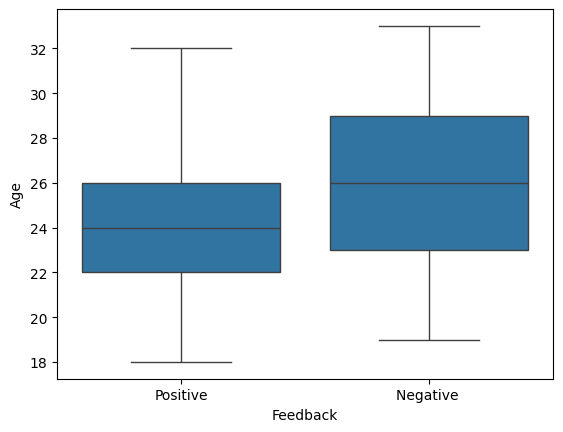

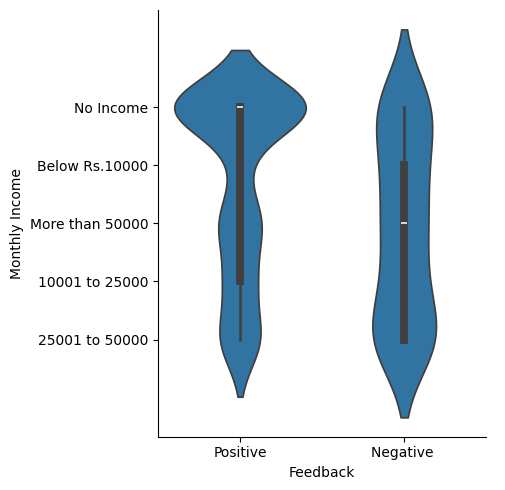

<ipython-input-75-7c299d5fd31c>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_subset.corr()


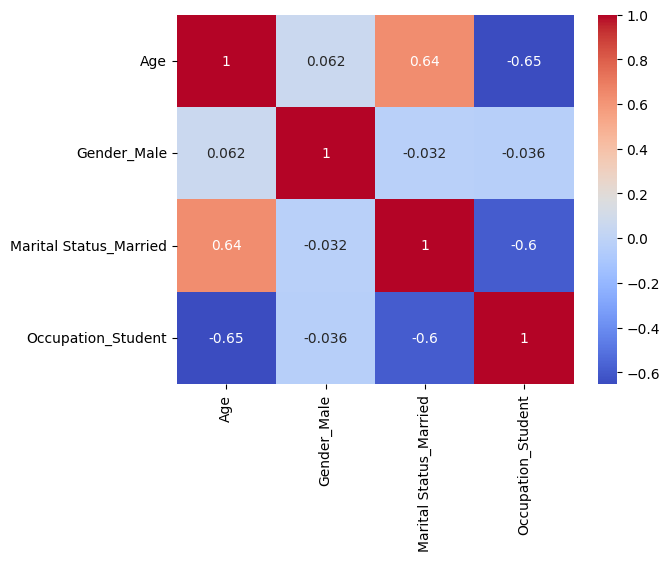

In [ ]:
# Distribution of Age and its impact on Feedback
sns.boxplot(x='Feedback', y='Age', data=data_subset)
plt.show()

# Proportions of Feedback across different levels of Monthly Income
sns.catplot(x='Feedback', y='Monthly Income', kind='violin', data=data_subset)
plt.show()

# Correlation matrix heatmap
correlation_matrix = data_subset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

<ipython-input-76-1933aace4210>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


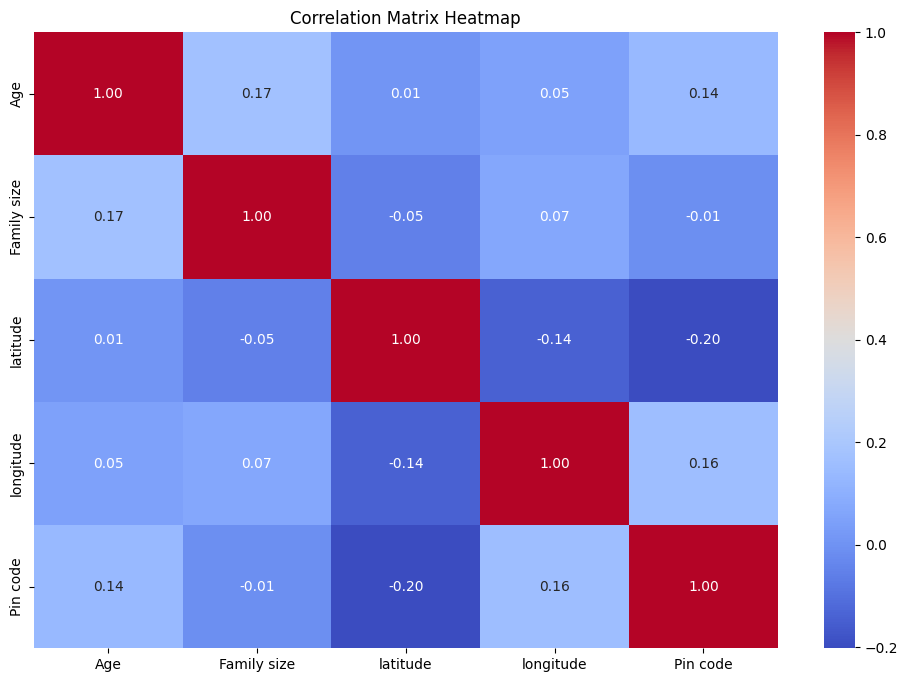

In [ ]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Logistic Regression model training
model = LogisticRegression()

In [ ]:
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [ ]:
# Predictions on the test set
y_pred = model.predict(X_test_scaled)

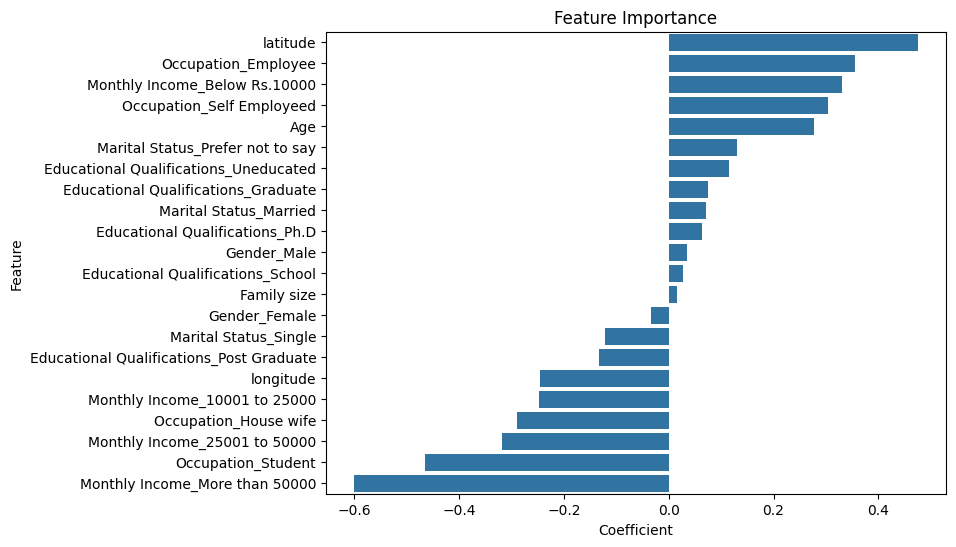

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


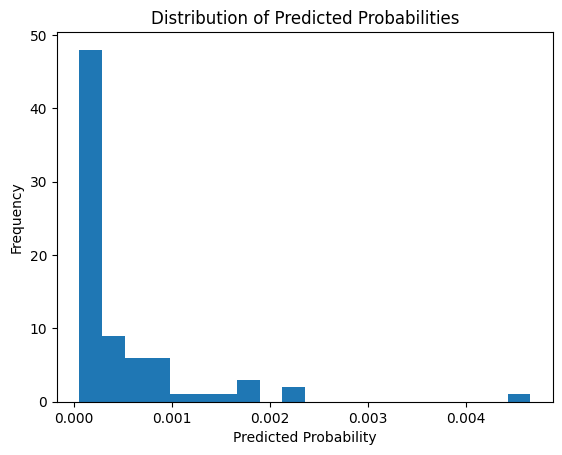

In [ ]:
# Step 1: Feature Importance
# Extract feature coefficients from the model
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)

# Visualize feature importance
plt.figure(figsize=(8, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()

# Step 2: Prediction Insights
# Visualize the distribution of predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]
plt.hist(y_pred_proba, bins=20)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()